# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix of the training data
    print("Computing covariance matrix...")
    covariance_matrix = np.dot(X_train.T, X_train)

    # Step 2: Eigenvalue decomposition of the covariance matrix
    print("Performing eigenvalue decomposition...")
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)  # eigh is for symmetric matrices

    # Step 3: Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 4: Select the top n_components eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Step 5: Project both train and test data onto the top eigenvectors
    print(f"Reducing dimensionality to {n_components} components...")
    X_train_reduced = np.dot(X_train, top_eigenvectors)
    X_test_reduced = np.dot(X_test, top_eigenvectors)

    return X_train_reduced, X_test_reduced, top_eigenvectors

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
# Define different numbers of SVD components to experiment with
svd_components = [10, 50, 100, 200, 400, 800, 1000]

# Store the results
results = []
top_singular_vectors = None  # Variable to store the top 5 singular vectors

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"\nApplying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, eigenvectors = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Record the results for this number of SVD components
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    # Save the top 5 singular vectors when using all components (784 components)
    if n_components == 1000:
        top_singular_vectors = eigenvectors[:, :5]  # Save the top 5 singular vectors
        print("Top singular vectors saved!")  # Ensure this line is printed

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Check if top_singular_vectors was assigned
if top_singular_vectors is None:
    print("Warning: top_singular_vectors was not saved correctly.")

Training models with different levels of SVD preprocessing...

Applying custom SVD with 10 components...
Computing covariance matrix...
Performing eigenvalue decomposition...
Reducing dimensionality to 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 2.8806 seconds

Applying custom SVD with 50 components...
Computing covariance matrix...
Performing eigenvalue decomposition...
Reducing dimensionality to 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 14.8480 seconds

Applying custom SVD with 100 components...
Computing covariance matrix...
Performing eigenvalue decomposition...
Reducing dimensionality to 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 55.3016 seconds

Applying custom SVD with 200 components...
Computing covariance matrix...
Performing eigenvalue decomposition...
Reducing dimensionality to 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 149.2322 seconds

Applying custom SVD with 400 components...
Computing covariance matrix...
Performing eigenvalue decomposition...
Reducing dimensionality to 400 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.9195, Training time: 427.3830 seconds

Applying custom SVD with 800 components...
Computing covariance matrix...
Performing eigenvalue decomposition...
Reducing dimensionality to 800 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 800, Accuracy: 0.9209, Training time: 860.5728 seconds

Applying custom SVD with 1000 components...
Computing covariance matrix...
Performing eigenvalue decomposition...
Reducing dimensionality to 1000 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Top singular vectors saved!
SVD components: 1000, Accuracy: 0.9209, Training time: 861.1188 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


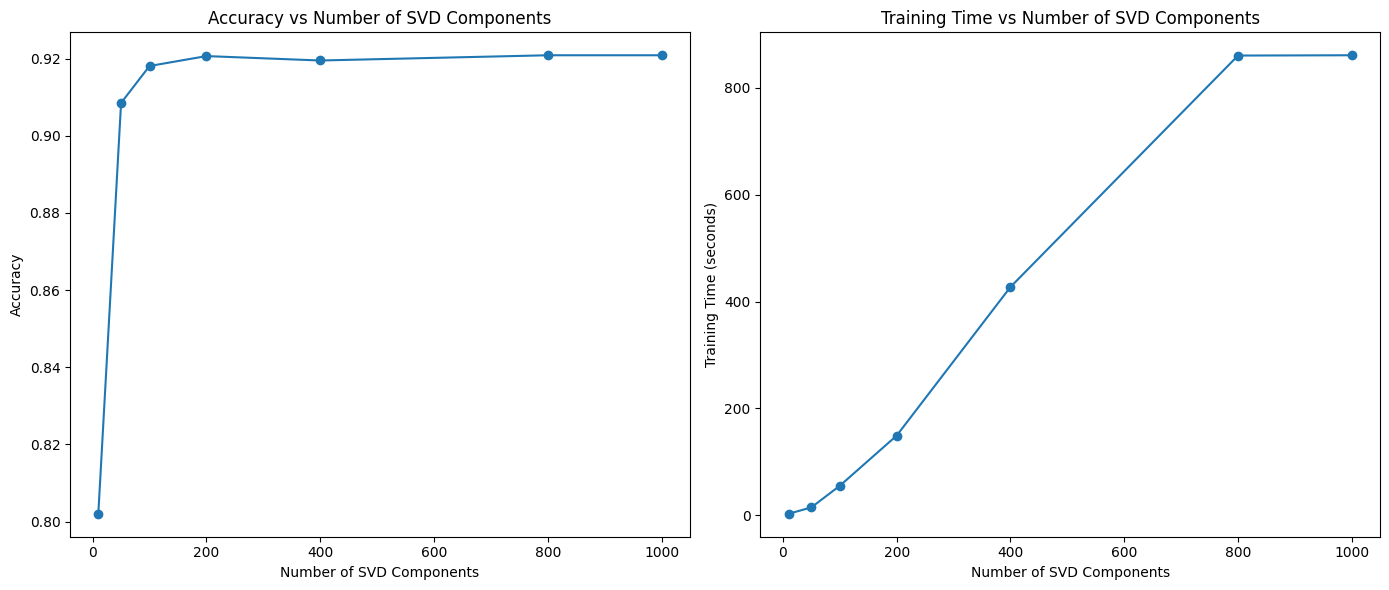

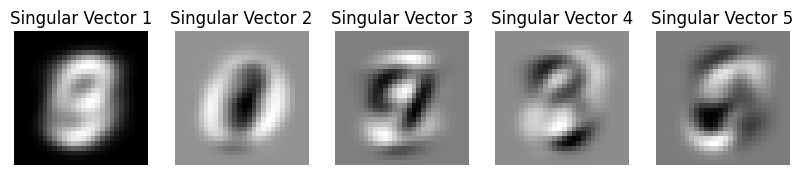

In [6]:
# Visualize accuracy and training time vs number of components
def visualize_results(results, top_singular_vectors):
    n_components_list = [result['n_components'] for result in results]
    accuracies = [result['accuracy'] for result in results]
    training_times = [result['training_time'] for result in results]

    # Step 1: Plot Accuracy vs Number of Components
    plt.figure(figsize=(14, 6))

    # Plot accuracy vs number of components
    plt.subplot(1, 2, 1)
    plt.plot(n_components_list, accuracies, marker='o')
    plt.title('Accuracy vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')

    # Plot training time vs number of components
    plt.subplot(1, 2, 2)
    plt.plot(n_components_list, training_times, marker='o')
    plt.title('Training Time vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')

    plt.tight_layout()
    plt.show()

    # Step 2: Visualize the Top 5 Singular Vectors
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(top_singular_vectors[:, i].reshape(28, 28), cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
    plt.show()

visualize_results(results, top_singular_vectors)

## Part 6: Analyze / Conclusion

YOUR ANSWER:

### Analysis

1. **Accuracy vs Number of SVD Components:**
   - The accuracy improves sharply as the number of SVD components increases, especially between 10 and 100 components. This suggests that the first few components capture the most important features in the data for the model's predictions.
   - After 200 components, the accuracy levels off, indicating that additional components add little value in terms of predictive performance. This is consistent with how SVD works—most of the useful variance in the dataset is captured by the early components, and later components mostly capture noise or less informative details.
   - The model reaches a peak accuracy of around 92%, and this happens around 200 components. Even though the number of components goes up to 1000, there’s no significant gain in accuracy, which means using more than 200 components doesn’t provide much benefit.

2. **Training Time vs Number of SVD Components:**
   - Training time increases substantially as the number of SVD components rises. This makes sense because more components mean higher-dimensional data, which takes more time for the logistic regression model to process.
   - The graph shows an exponential increase in training time as the number of components goes beyond 200. At 1000 components, the training time is extremely high (over 800 seconds), while at 200 components it’s much more manageable (~150 seconds). This indicates that reducing the dimensionality of the data significantly improves training efficiency without hurting model performance too much.

   **Key Observation**: There’s a clear trade-off between the accuracy and the training time. Adding more components slightly improves accuracy, but the cost in terms of training time becomes excessive. The sweet spot seems to be around 200 components, where we get high accuracy with relatively low computational cost.

3. **Singular Vectors Visualization:**
   - The top 5 singular vectors, when reshaped into 28x28 images, resemble blurred versions of handwritten digits, which makes sense if this is from a dataset like MNIST.
   - **Singular Vector 1** seems to capture the most general features of the digits, possibly representing a common structure across many images.
   - **Singular Vectors 2-5** capture more detailed and varied features, likely corresponding to different characteristics that help the model distinguish between different digits.
   - These singular vectors serve as the basis of the reduced feature space, and the fact that they visually resemble parts of digits shows that SVD is working well in extracting meaningful features from the original high-dimensional data.

### Conclusion

Based on the analysis of the graphs and singular vectors, the following conclusions can be drawn:

1. **Optimal Number of SVD Components**: Using around 200 SVD components gives the best balance between accuracy and training time. It captures most of the meaningful variance in the data, as evidenced by the fact that accuracy doesn’t improve much after 200 components. In other words, we can significantly reduce the dimensionality (from 1000 features down to 200) while maintaining nearly the same model performance.

2. **Dimensionality Reduction Benefits**: SVD offers a huge boost in computational efficiency. Reducing the number of components from 1000 to 200 cuts the training time by a large factor without sacrificing much accuracy. This shows that dimensionality reduction is an important preprocessing step, especially when working with large datasets and complex models.

3. **Singular Vectors Interpretation**: The top 5 singular vectors visually show that SVD is capturing the essential features of the dataset. The vectors resemble digits, indicating that they represent the most important patterns in the data. This means the logistic regression model is leveraging these key features for classification, even after reducing the dimensionality.

4. **Trade-off Between Performance and Computational Cost**: There’s a clear trade-off here. While increasing the number of SVD components slightly improves accuracy, it also dramatically increases training time. In practice, it’s better to settle on a smaller number of components (like 200), which provides a good trade-off between high accuracy and low computational cost.

### Final Thoughts:
For future models, using around 200 components would be optimal as it captures most of the important information without making the training process too computationally expensive. Dimensionality reduction techniques like SVD are clearly valuable for balancing performance with efficiency, especially in scenarios where you need to handle large amounts of data quickly.